# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** --
- **Email:** --
- **ID Dicoding:** --

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan antara rental pada holidays dengan non-holidays?
- Bagaimana perbandingan antara rental pada kondisi cuaca tertentu?

## Import Semua Packages/Library yang Digunakan

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [51]:
# Men declare data
day_df = pd.read_csv("/content/drive/MyDrive/Dataset Dicoding/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/Dataset Dicoding/hour.csv")

# Mencampurkan dua dataset
combine_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="instant",
    right_on="instant"
)

combine_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [52]:
# Check apakah ada missing value atau tidak.
combine_df.isna().sum()

instant         0
dteday_x        0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
dteday_y        0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64

In [53]:
# Check apakah ada value yang terduplikasi atau tidak.
print("Duplicate Total:", combine_df.duplicated().sum())

Duplicate Total: 0


In [54]:
# Check apakah ada inaccurate value atau tidak.
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   dteday_x      731 non-null    object 
 2   season_x      731 non-null    int64  
 3   yr_x          731 non-null    int64  
 4   mnth_x        731 non-null    int64  
 5   holiday_x     731 non-null    int64  
 6   weekday_x     731 non-null    int64  
 7   workingday_x  731 non-null    int64  
 8   weathersit_x  731 non-null    int64  
 9   temp_x        731 non-null    float64
 10  atemp_x       731 non-null    float64
 11  hum_x         731 non-null    float64
 12  windspeed_x   731 non-null    float64
 13  casual_x      731 non-null    int64  
 14  registered_x  731 non-null    int64  
 15  cnt_x         731 non-null    int64  
 16  dteday_y      731 non-null    object 
 17  season_y      731 non-null    int64  
 18  yr_y          731 non-null    

### Cleaning Data

In [55]:
# Berdasarkan dari data assesment sebelumnya kita harus mengubah data type 'dteday' dan juga nama dari mnth dan yr.

# Merubah data type dteday dari object ke datetime.
dteday_column = "dteday_x"

for column in dteday_column:
  combine_df[dteday_column] = pd.to_datetime(combine_df[dteday_column])

In [56]:
# Merubah nama mnth dan yr agar dapat memberikan penjelasan yang lebih baik.
combine_df.rename(columns={'mnth_x': 'month_x', 'yr_x': 'year_x'}, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [57]:
combine_df.describe(include="all")

<ipython-input-57-f6bf90d44f2b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  combine_df.describe(include="all")


,instant,dteday_x,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,...,2.905609,0.645691,1.514364,0.199179,0.206447,0.589343,0.194056,4.348837,51.554036,55.902873
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,...,2.070830,0.478631,0.656474,0.077568,0.076911,0.180080,0.122993,6.047760,46.772264,48.996339
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,...,1.000000,0.000000,1.000000,0.160000,0.151500,0.455000,0.104500,0.000000,15.000000,16.000000


In [58]:
# Check stats untuk bike rental pada holidays dan non-holidays
holiday_data = combine_df[combine_df['holiday_y'] == 1]
non_holiday_data = combine_df[combine_df['holiday_y'] == 0]

holiday_rentals_summary = holiday_data['cnt_y'].describe()
non_holiday_rentals_summary = non_holiday_data['cnt_y'].describe()

print("Summary Statistics for Bike Rentals on Holidays:")
print(holiday_rentals_summary)
print("\nSummary Statistics for Bike Rentals on Non-Holidays:")
print(non_holiday_rentals_summary)

Summary Statistics for Bike Rentals on Holidays:
count    24.000000
mean     41.666667
std      34.083869
min       1.000000
25%      11.750000
50%      33.000000
75%      73.250000
max      93.000000
Name: cnt_y, dtype: float64

Summary Statistics for Bike Rentals on Non-Holidays:
count    707.000000
mean      56.386139
std       49.368815
min        1.000000
25%       16.000000
50%       49.000000
75%       80.500000
max      249.000000
Name: cnt_y, dtype: float64


In [59]:
# Check stats bike rental pada cuaca tertentu.
weather_groups = combine_df.groupby('weathersit_x')

rentals_by_weather = weather_groups['cnt_y'].agg(['describe'])

print(rentals_by_weather)

             describe                                                    
                count       mean        std  min   25%   50%   75%    max
weathersit_x                                                             
1               463.0  53.809935  47.843252  1.0  13.0  49.0  77.0  249.0
2               247.0  59.599190  51.539839  1.0  20.0  46.0  87.0  238.0
3                21.0  58.571429  42.394070  2.0  28.0  48.0  92.0  136.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

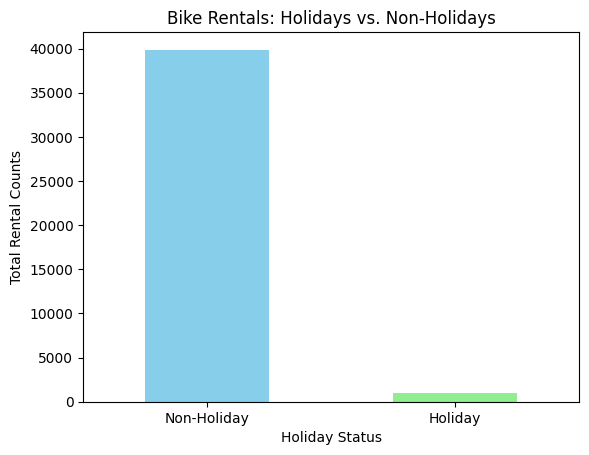

In [60]:
# Visualisasi dari EDA exploration sebelumnya (perbandingan data rental di holidays dan non-holidays).
holiday_groups = combine_df.groupby('holiday_y')

rentals_by_holiday = holiday_groups['cnt_y'].sum()

rentals_by_holiday.plot(kind='bar', rot=0, color=['skyblue', 'lightgreen'])
plt.title('Bike Rentals: Holidays vs. Non-Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Total Rental Counts')
plt.xticks(range(len(rentals_by_holiday)), ['Non-Holiday', 'Holiday'])
plt.show()

### Pertanyaan 2:

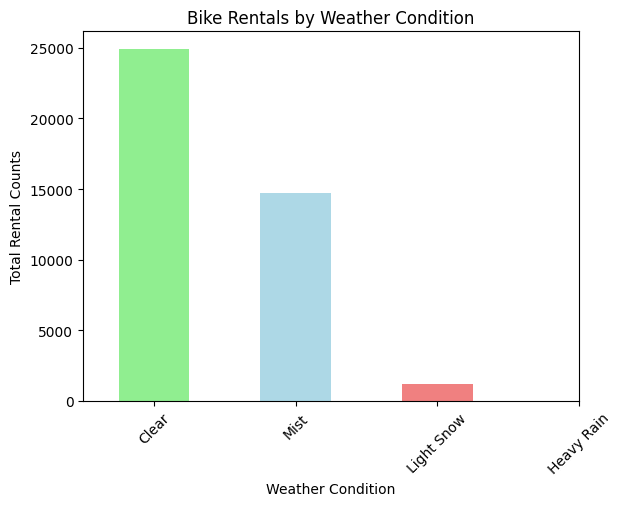

In [61]:
# Visualisasi dari EDA exploration sebelumnya (perbandingan data rental pada cuaca tertentu).
weather_groups = combine_df.groupby('weathersit_x')
rentals_by_weather = weather_groups['cnt_y'].sum()

labels = ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']

rentals_by_weather.plot(kind='bar', rot=0, color=['lightgreen', 'lightblue', 'lightcoral', 'lightgrey'])
plt.title('Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rental Counts')
plt.xticks(range(len(labels)), labels, rotation=45)
plt.show()

## Conclusion

- Conclution yang dapat diambil dari pertanyaan pertama dan hasil dari analisis adalah bahwa orang-orang lebih suka merental sepeda pada hari non-holidays. Hasil analisis dapat membantu untuk persiapan stok sepeda dan strategi pemasaran.
- Conclution yang dapat diambil dari pertanyaan kedua dan hasil dari analisis adalah orang-orang lebih cenderung meminjam sepeda saat cuaca sedang 'clear'. Hasil analisis dapat membantu memahami pola peminjaman sepeda pada sebuah kondisi cuaca tertentu.